In [111]:
import ROOT as r
QCDFile = r.TFile("../QCD/htt_scalefactors_legacy_2016.root")
w = QCDFile.Get("w")
w.function("em_qcd_osss").dumpFormula()

In [83]:
w.function("em_qcd_osss").dumpFormula()

In [62]:
w.function("em_qcd_osss").Print()
w.function("em_qcd_osss_0jet").Print()
w.function("em_qcd_osss_1jet").Print()
w.function("em_qcd_osss_2jet").Print()

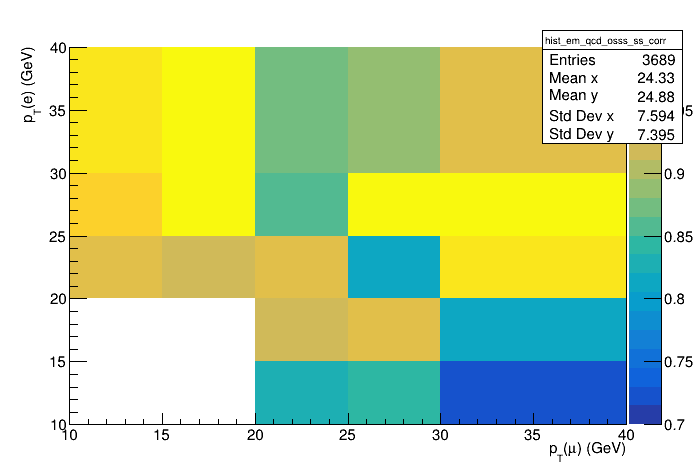

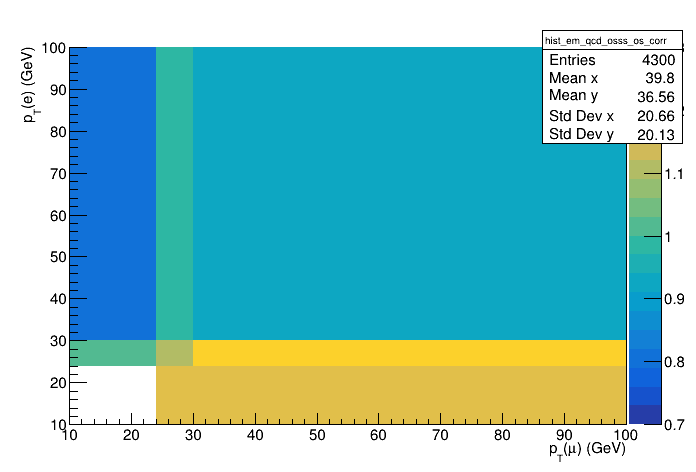

In [93]:
hss = w.obj("hist_em_qcd_osss_ss_corr")
hos = w.obj("hist_em_qcd_osss_os_corr")
fileOut = r.TFile('../QCD/em_qcd_osss_2016.root', 'recreate')
hss.Write()
hos.Write()
fileOut.Close()
c1 = r.TCanvas()
hss.Draw("COLZ")
c1.Draw()
c2 = r.TCanvas()
hos.Draw("COLZ")
c2.Draw()

In [117]:
from coffea.lookup_tools import extractor
import numpy as np
import awkward as ak
import numexpr as ne
test_len=1
###NOT NEEDED
njets = np.array([1]*test_len)
dr = np.array([1]*test_len)
ept = np.array([30]*test_len)
mpt = np.array([30]*test_len)
###NOT NEEDED

ext = extractor()
ext.add_weight_sets(["hist_em_qcd_osss_ss_corr hist_em_qcd_osss_ss_corr ../QCD/em_qcd_osss_2016.root", "hist_em_qcd_osss_os_corr hist_em_qcd_osss_os_corr ../QCD/em_qcd_osss_2016.root"])
ext.finalize()
evaluator = ext.make_evaluator()
ss_corr, os_corr = evaluator["hist_em_qcd_osss_ss_corr"](mpt, ept), evaluator["hist_em_qcd_osss_os_corr"](mpt, ept)
#2016
ak.numexpr.evaluate("((njets==0)*(2.852125+-0.282871*dr)+(njets==1)*(2.792455+-0.295163*dr)+(njets>=2)*(2.577038+-0.290886*dr))*ss_corr*os_corr")
ne.evaluate("((njets==0)*(2.852125+-0.282871*dr)+(njets==1)*(2.792455+-0.295163*dr)+(njets>=2)*(2.577038+-0.290886*dr))*ss_corr*os_corr")
#2017
#ne.evaluate("((njets==0)*(2.852125+-0.282871*dr)+(njets==1)*(2.792455+-0.295163*dr)+(njets>=2)*(2.577038+-0.290886*dr))*ss_corr*os_corr")
#2018
#ne.evaluate("((njets==0)*(2.852125+-0.282871*dr)+(njets==1)*(2.792455+-0.295163*dr)+(njets>=2)*(2.577038+-0.290886*dr))*ss_corr*os_corr")

array([2.17322156])

In [95]:
filein = r.TFile('../QCD/em_qcd_osss_2016.root')
hss = filein.Get('hist_em_qcd_osss_ss_corr')
hos = filein.Get('hist_em_qcd_osss_os_corr')
from coffea.lookup_tools import extractor
ext = extractor()
ext.add_weight_sets(["hist_em_qcd_osss_ss_corr hist_em_qcd_osss_ss_corr ../QCD/em_qcd_osss_2016.root", "hist_em_qcd_osss_os_corr hist_em_qcd_osss_os_corr ../QCD/em_qcd_osss_2016.root"])
ext.finalize()
evaluator = ext.make_evaluator()

2 dimensional histogram with axes:
	1: [ 10.  24.  30. 100.]
	2: [ 10.  24.  30. 100.]

In [109]:
import numpy as np
import numexpr as ne
test_len = 10000000
njets = np.array([1]*test_len)
dr = np.array([1]*test_len)
ept = np.array([30]*test_len)
mpt = np.array([30]*test_len)
ss_corr = evaluator["hist_em_qcd_osss_ss_corr"](mpt, ept)
os_corr = evaluator["hist_em_qcd_osss_os_corr"](mpt, ept)
ne.evaluate("((njets==0)*(2.852125+-0.282871*dr)+(njets==1)*(2.852125+-0.282871*dr)+(njets>=2)*(2.852125+-0.282871*dr))*ss_corr*os_corr")

array([2.23584515, 2.23584515, 2.23584515, ..., 2.23584515, 2.23584515,
       2.23584515])

In [108]:
ne.evaluate("(2.852125+-0.282871*dr)*ss_corr*os_corr")

array([2.23584515, 2.23584515, 2.23584515, ..., 2.23584515, 2.23584515,
       2.23584515])

In [98]:
%%timeit
QCDSF_ = np.zeros(len(njets))
for i in range(len(njets)):
    w.var('njets').setVal(njets[i])
    w.var('dR').setVal(dr[i])
    w.var('e_pt').setVal(ept[i])
    w.var('m_pt').setVal(mpt[i])
    QCDSF_[i] = w.function('em_qcd_osss').getVal()

KeyboardInterrupt: 

In [26]:
import numba
@numba.njit
def QCDSF(njets, dr, ept, mpt):
    QCDSF_ = np.zeros(len(njets))
    for i in range(len(njets)):
        w.var('njets').setVal(njets[i])
        w.var('dR').setVal(dr[i])
        w.var('e_pt').setVal(ept[i])
        w.var('m_pt').setVal(mpt[i])
        QCDSF_[i] = w.function('em_qcd_osss').getVal()
    return QCDSF_
    

In [27]:
%%timeit
QCDSF(njets, dr, ept, mpt)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'w':[0m [1m[1mCannot determine Numba type of <class cppyy.gbl.RooWorkspace at 0x55c1d4e6e1a0>[0m
[1m
File "../../../../../../../tmp/ipykernel_1920703/850878217.py", line 6:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m